In [1]:
# インポート集（統計）
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [2]:
# CSV読み込み
df = pd.read_csv("c511.csv")
df.head()

beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


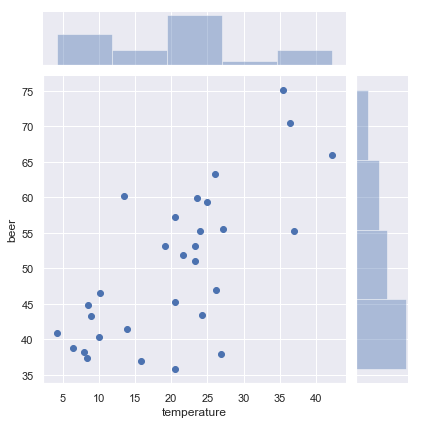

In [3]:
# グラフ化
sns.jointplot(x="temperature", y="beer", data=df);

In [4]:
# モデリング
m = smf.ols(formula="beer ~ temperature", data=df).fit() 
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 27 Dec 2018   Prob (F-statistic):           1.11e-05
Time:                        17:42:04   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### メモ

- ols : 最小二乗法(ordinaly least square)
- beer ~ temperature : 応答変数(beer)と説明変数(temperature)指定
- fit : 学習（推定）
---
- 数理モデル: 現象を数式で表したもの
- 確率モデル: 数理モデルの内、確率的な表現を扱うもの
- 統計モデル: データに適合するよう作成された確率モデル
<br><br>
- 説明変数 (=独立変数）(x)
- 応答変数 (=従属変数）(y)
<br><br>
- 帰無仮説: 説明変数の係数β1は0。
- 対立仮説: 説明変数の係数β1は0と異なる。-> モデルにその説明変数が**必要**。
<br><br>
- 最尤法：　尤度を最大化するパラメタを、パラメタの推定値として採用する方法
- 最尤推定量: 最尤法によって推定されたパラメタ
- 最大対数尤度: 最尤推定量での対数尤度
 - コイン投げはθ = 1/2で尤度最大 -> これが最尤推定量。

<br><br>
- 点推定: 母数をある一つの値として指定する推定方法（母平均を推定する場合、標本平均が推定量）
- 区間推定: 推定値に幅を持たせた推定方法。（幅を持たせるために確率を用いる。）推定誤差を考慮できる。
- 信頼係数： 区間推定の幅における信頼の度合いを確率で表したもの
- 信頼区間： ある信頼係数を満たす区間
- 信頼限界： 信頼区間の下限値と上限値
<br><br>

- 局外パラメタ： 直接の関心が無いパラメタ。（平均と分散の内、分散は平均から計算すれば良いので局外パラメタ）
- モデルの原則: モデルは単純な方が良い。
- 情報量基準：　推定されたモデルの悪さ。モデル比較に用いる。情報量基準小→良いモデル。AIC,BICなど。
- 回帰直線： モデルによる応答変数(y)の推測値を直線で表したもの


---
- Dep.Variable: 応答変数（=従属変数）（Depended：依存）
- Date・Time: 推定日時
- No.Observations: サンプルサイズ
- Df Residuals: サンプルサイズから「推定されたパラメタ数」を引いたもの (Residual：残り）
- Df Model: 用いられた説明変数の数
- R-Squared: 決定係数
- Adj.R-Squared: 自由度調整済み決定係数
- F-statistic、Prob(F-statistic)：　分散分析の結果
- Log-Likelihood: 最大化対数尤度
- AIC： 赤池の情報量基準(Akaike's Information Criterion)<br>
       AIC = -2 * (最大化対数尤度 - 推定されたパラメタの個数）
- BIC: ベイズ情報量基準（情報量基準の一種）

- \[0.025 : 95% 信頼区間における下側信頼限界
- \[0.975 : 95% 信頼区間における上側信頼限界

---
- 表の見方 : temperatureのcoefが0.7654(正) -> 正の相関あり！（気温大→ビールの売上大）



In [5]:
# モデルの比較 （AICが小さい方が良いモデル）
m1 = smf.ols("beer ~ 1", data=df).fit() # Nullモデル構築（説明変数が無い）（1を使用）
m1.aic

227.94194972563105

In [6]:
m.aic

208.90902935575437

-> 説明変数が有るモデルの方がAIC小（モデル良）-> 説明変数はあった方が良い//

In [7]:
# （AICを計算で求める）（AIC = -2 * (最大化対数尤度 - 推定されたパラメタの個数））
-2 * (m.llf - (m.df_model + 1))

208.90902935575437

-> メソッドで求めたものと同じ//

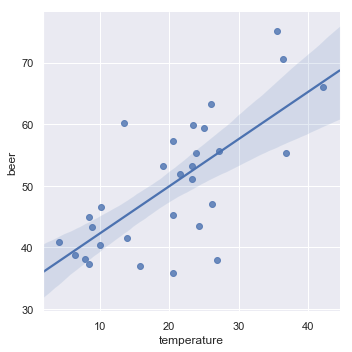

In [8]:
# 回帰直線
sns.lmplot(x="temperature", y="beer", data=df); 

# ・オプション：
#  　散布図デザイン：　scatter_kws = {"color":"black"}
#  　直線デザイン：　 line_kws = {"color":"black"}
# ・編みかけ：　95%信頼区間

In [9]:
# 予測（訓練データ全て(30個）に対して）
m.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [10]:
m.predict().shape

(30,)

In [11]:
# データフレーム作成（気温列が0）
df1 = pd.DataFrame({
    "temperature" : [0]
})

In [12]:
# 予測（気温0℃の時のビールの売り上げ）
m.predict(df1)

0    34.610215
dtype: float64

-> 気温0度に対するビールの売り上げは34.6！

In [13]:
# 推定値
m.params

Intercept      34.610215
temperature     0.765428
dtype: float64

-> Intercept(切片)も34.6なので、確かに合っている//

In [14]:
# 予測（気温20度の時のビールの売り上げ）
df2 = pd.DataFrame({
    "temperature": [20]
})
m.predict(df2)

0    49.918767
dtype: float64

In [15]:
# 確かめ　（β0 + β1 x 20)
b0 = m.params[0]
b1 = m.params[1]

b0 + b1 * 20

49.91876701095054

-> OK //

In [16]:
#P291